# Project 3 Code
- 09.19.2023
- Data Enrichment

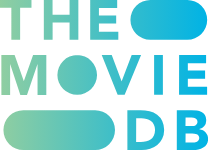

Data Source: https://datasets.imdbws.com

## Data Dictionary

**title.akas.tsv.gz**
- titleId (string) - a tconst, an alphanumeric unique identifier of the title
- ordering (integer) – a number to uniquely identify rows for a given titleId
- title (string) – the localized title
- region (string) - the region for this version of the title
- language (string) - the language of the title
- types (array) - Enumerated set of attributes for this alternative title. One or more of the following: "alternative", "dvd", "festival", "tv", "video", "working", "original", "imdbDisplay". New values may be added in the future without warning
- attributes (array) - Additional terms to describe this alternative title, not enumerated
- isOriginalTitle (boolean) – 0: not original title; 1: original title

**title.basics.tsv.gz**
- tconst (string) - alphanumeric unique identifier of the title
- titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
- primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
- originalTitle (string) - original title, in the original language
- isAdult (boolean) - 0: non-adult title; 1: adult title
- startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year
- endYear (YYYY) – TV Series end year. ‘\N’ for all other title types
- runtimeMinutes – primary runtime of the title, in minutes
- genres (string array) – includes up to three genres associated with the title

**title.ratings.tsv.gz**
- tconst (string) - alphanumeric unique identifier of the title
- averageRating – weighted average of all the individual user ratings
- numVotes - number of votes the title has received

In [30]:
# Imports
import gzip
import pandas as pd
import numpy as np
import seaborn as sns

In [31]:
# Load dataset URLs
# basics_url = "https://datasets.imdbws.com/title.basics.tsv.gz"
# ratings_url = "https://datasets.imdbws.com/title.ratings.tsv.gz"

In [32]:
# Read in the datasets    
# basics = pd.read_csv(basics_url, sep='\t', low_memory=False)
# ratings = pd.read_csv(ratings_url, sep='\t', low_memory=False)

In [33]:
# Read in the akas dataset
with gzip.open('Data/title-akas-us-only.csv', 'rb') as f:
    akas = pd.read_csv(f, encoding='utf-8', low_memory=False)

akas.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,6,Carmencita,US,NaN,imdbDisplay,NaN,0.0
1,tt0000002,7,The Clown and His Dogs,US,NaN,NaN,literal English title,0.0
2,tt0000005,10,Blacksmith Scene,US,NaN,imdbDisplay,NaN,0.0
3,tt0000005,1,Blacksmithing Scene,US,NaN,alternative,NaN,0.0
4,tt0000005,6,Blacksmith Scene #1,US,NaN,alternative,NaN,0.0


In [34]:
# Open saved basics file and preview again
basics = pd.read_csv("Data/title_basics.csv.gz", low_memory = False)
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118,"Comedy,Fantasy,Romance"
1,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020.0,NaN,70,Drama
2,tt0068865,movie,Lives of Performers,Lives of Performers,0,2016.0,NaN,90,Drama
3,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,NaN,122,Drama
4,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,NaN,100,"Comedy,Horror,Sci-Fi"


In [35]:
# Open saved ratings file and preview again
ratings = pd.read_csv("Data/title_ratings.csv.gz", low_memory = False)
ratings.head()

,tconst,averageRating,numVotes
0,tt0035423,6.4,87572
1,tt0062336,6.4,180
2,tt0068865,5.4,74
3,tt0069049,6.7,7831
4,tt0088751,5.2,340


In [36]:
# Preview first 5 rows of akas dataset
akas.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,6,Carmencita,US,NaN,imdbDisplay,NaN,0.0
1,tt0000002,7,The Clown and His Dogs,US,NaN,NaN,literal English title,0.0
2,tt0000005,10,Blacksmith Scene,US,NaN,imdbDisplay,NaN,0.0
3,tt0000005,1,Blacksmithing Scene,US,NaN,alternative,NaN,0.0
4,tt0000005,6,Blacksmith Scene #1,US,NaN,alternative,NaN,0.0


In [37]:
# Preview first 5 rows of basics dataset
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118,"Comedy,Fantasy,Romance"
1,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020.0,NaN,70,Drama
2,tt0068865,movie,Lives of Performers,Lives of Performers,0,2016.0,NaN,90,Drama
3,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,NaN,122,Drama
4,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,NaN,100,"Comedy,Horror,Sci-Fi"


In [38]:
# Preview first 5 rows of ratings dataset
ratings.head()

,tconst,averageRating,numVotes
0,tt0035423,6.4,87572
1,tt0062336,6.4,180
2,tt0068865,5.4,74
3,tt0069049,6.7,7831
4,tt0088751,5.2,340


In [39]:
# Make a copy of akas_us
akas_copy = akas.copy()

In [40]:
# Replace "\N" with np.nan and verify that it stuck
akas_copy.replace({'\\N':np.nan}, inplace=True)
akas_copy.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,6,Carmencita,US,NaN,imdbDisplay,NaN,0.0
1,tt0000002,7,The Clown and His Dogs,US,NaN,NaN,literal English title,0.0
2,tt0000005,10,Blacksmith Scene,US,NaN,imdbDisplay,NaN,0.0
3,tt0000005,1,Blacksmithing Scene,US,NaN,alternative,NaN,0.0
4,tt0000005,6,Blacksmith Scene #1,US,NaN,alternative,NaN,0.0


In [41]:
# Keep only US movies in the basics dataframe
basics_keepers = basics['tconst'].isin(akas_copy['titleId'])
basics_filtered = basics[basics_keepers]
basics_filtered

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118,"Comedy,Fantasy,Romance"
1,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020.0,NaN,70,Drama
2,tt0068865,movie,Lives of Performers,Lives of Performers,0,2016.0,NaN,90,Drama
3,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,NaN,122,Drama
4,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,NaN,100,"Comedy,Horror,Sci-Fi"
...,...,...,...,...,...,...,...,...,...
114437,tt9915436,movie,Vida em Movimento,Vida em Movimento,0,2019.0,NaN,70,Documentary
114438,tt9915872,movie,The Last White Witch,Boku no kanojo wa mahoutsukai,0,2019.0,NaN,97,"Comedy,Drama,Fantasy"
114439,tt9916170,movie,The Rehearsal,O Ensaio,0,2019.0,NaN,51,Drama
114440,tt9916190,movie,Safeguard,Safeguard,0,2020.0,NaN,95,"Action,Adventure,Thriller"


In [42]:
# Make a copy of basics_filtered
basics_filtered_copy = basics_filtered.copy()

In [43]:
# Replace "\N" with np.nan and verify that it stuck
basics_filtered_copy.replace({'\\N':np.nan}, inplace=True)
basics_filtered_copy.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118,"Comedy,Fantasy,Romance"
1,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020.0,NaN,70,Drama
2,tt0068865,movie,Lives of Performers,Lives of Performers,0,2016.0,NaN,90,Drama
3,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,NaN,122,Drama
4,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,NaN,100,"Comedy,Horror,Sci-Fi"


In [44]:
# Eliminate movies that are null for runtimeMinutes
# Eliminate movies that are null for genre
basics_filtered_copy = basics_filtered_copy.dropna(subset=['runtimeMinutes', 'genres'])

In [45]:
# Keep only titleType==Movie
basics_filtered_copy = basics_filtered_copy[basics_filtered_copy['titleType'] == 'movie']

In [46]:
# Convert the startYear column to float data type.
basics_filtered_copy['startYear'] = basics_filtered_copy['startYear'].astype(float)

In [47]:
# Filter the dataframe using startYear. Keep years between 2000-2021 (Including 2000 and 2021)
basics_filtered_copy = basics_filtered_copy[(basics_filtered_copy['startYear'] 
                                             >= 2000) & (basics_filtered_copy
                                                         ['startYear'] <= 2021)]

In [48]:
# Filter the ratings DataFrame based on tconst from basics_filtered_copy
ratings_filtered = ratings[ratings['tconst'].isin(basics_filtered_copy['tconst'])]

In [49]:
# Make a copy of ratings_filtered
ratings_filtered_copy = ratings_filtered.copy()

In [50]:
# Replace "\N" with np.nan in the ratings DataFrame
ratings_filtered_copy.replace({'\\N':np.nan}, inplace=True)
ratings_filtered_copy.head()

,tconst,averageRating,numVotes
0,tt0035423,6.4,87572
1,tt0062336,6.4,180
2,tt0068865,5.4,74
3,tt0069049,6.7,7831
4,tt0088751,5.2,340


In [51]:
# Run a final .info() on akas_us_copy dataframe
akas_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452564 entries, 0 to 1452563
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   titleId          1452564 non-null  object 
 1   ordering         1452564 non-null  int64  
 2   title            1452564 non-null  object 
 3   region           1452564 non-null  object 
 4   language         4018 non-null     object 
 5   types            981678 non-null   object 
 6   attributes       47016 non-null    object 
 7   isOriginalTitle  1451222 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 88.7+ MB


In [52]:
# Run a final .info() on basics_filtered_copy dataframe
basics_filtered_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114442 entries, 0 to 114441
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          114442 non-null  object 
 1   titleType       114442 non-null  object 
 2   primaryTitle    114442 non-null  object 
 3   originalTitle   114442 non-null  object 
 4   isAdult         114442 non-null  int64  
 5   startYear       114442 non-null  float64
 6   endYear         0 non-null       float64
 7   runtimeMinutes  114442 non-null  int64  
 8   genres          114442 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 8.7+ MB


In [53]:
# Run a final .info() on ratings_filtered_copy dataframe
ratings_filtered_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87547 entries, 0 to 87546
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         87547 non-null  object 
 1   averageRating  87547 non-null  float64
 2   numVotes       87547 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ MB


In [54]:
# Save akas_us_copy dataframe to csv file
akas_copy.to_csv("Data/title-akas-us-only.csv", compression='gzip', index=False)

In [55]:
# Save basics_filtered_copy dataframe to csv file
basics_filtered_copy.to_csv("Data/title_basics.csv.gz", compression='gzip', index=False)

In [56]:
# Save ratings_us_copy dataframe to csv file
ratings_filtered_copy.to_csv("Data/title_ratings.csv.gz", compression='gzip', index=False)